# <center>CS 7324 Lab 3
## <center>Francesco Trozzi (47779944) - George Sammit (04010135) - Megan Simons (46334773)

# Preparation and Overview

### Business Case
The dataset (https://www.kaggle.com/shivam2503/diamonds) studied for this lab presents ~54K polished diamonds and their attributes.  Among those attributes are what are commonly referred to as the 4Cs, those being color, clarity, cut, and carat (see below for details).  In addition, the data set presents certain measurements of the diamond.  Finally, it presents the diamonds price.  

For this lab, we attempt to predict the price (which ranges from \\$328 to \\$18,823 in the full dataset) of a diamond given its attributes.  This would normally be a regression, however, we transform the problem to a classification problem by stratifying the data.  Specifically, we divide the price into “bins.”  This is aciheved by observing that diamond price is non-linear.  For example, the change below from (https://www.diamonds.pro/education/diamond-prices/) plots price by carat weight.

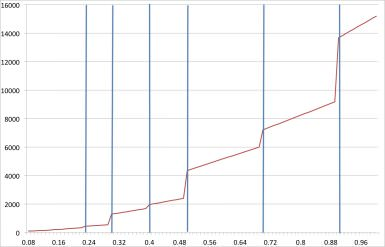

We notice a similar pattern in our dataset

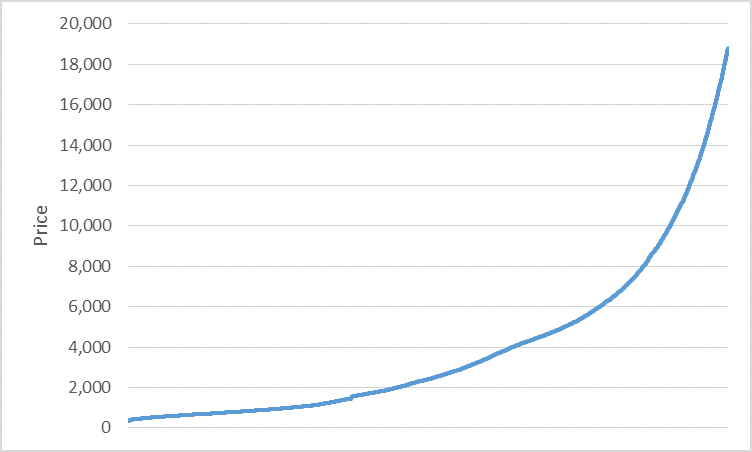
That said, we decided to slightly modify our binning strategy to more align with a base-10 log curve.  While the bins are still large, we believe this to be inline with some of the existing on-line tools which provide large ranges.  Again, this is better implemented as a linear regression problem than a classification problem.  As suggested, we removed the high-end diamonds.  This scheme accounts for 96.0% of our data set

| <center>price range | <center>data accounted for |
| --- | --- |
| \\$0-1,000 | 14,499 / 26.88% |
| \\$1,001-3,000 | 15,835 / 29.36% |
| \\$3,000-8,000 | 16,000 / 29.66% |
| \\$8,000-14,000 | 5,447 / 10.10% |

This has a real-world application for general consumers.  A consumer may be interested in ensuring that he is paying a fair price for a diamond given its attributes.  Likewise, a consumer may be interested in obtaining the “best” diamond for a given price point, perhaps sacrificing color, cut, clarity, in favor of a larger size.  An investor or a diamond merchant may find this application useful, but is likely to already have a sophisticated method for determining price. An appropriate measure of success for the general consumer would be the ability to predict a diamond’s value within 5-10% of its true market price.  We may also compare our algorithm with similar calculators on the Internet.

    
### Diamond Quality (Value) in a Nutshell
Diamonds are unique, however, a great deal of effort has gone into classifying them throughout history.  Generally, speaking, the rarer the diamond, the higher the price, and the rarity is generally determined through the 4Cs which are described in more detail below.  For refernce, the graphic below shows the relevant aspects of a diamond
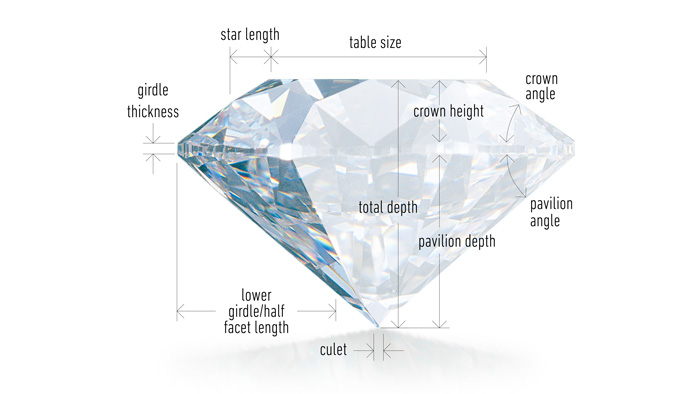
Much of the following information is readily available through the Gemological Institute of America Inc (GIA).  Refer to https://4cs.gia.edu/en-us/diamond-cut/ and https://www.gia.edu/diamond-quality-factor

#### Shape
As shown below, diamonds come in many different shapes.  Shape is a generally a personal preference, however, it is commonly thought that round diamonds command the highest prices, primarily because of inherent brilliance of this shape.  While the data set does not include the shape of the gems, we may infer that they are in fact round or square diamonds by comparing the provided length and width.  The difference thereof ranges between 0 and 50.81mm with an average difference of 0.05mm and a standard deviation of 0.25mm
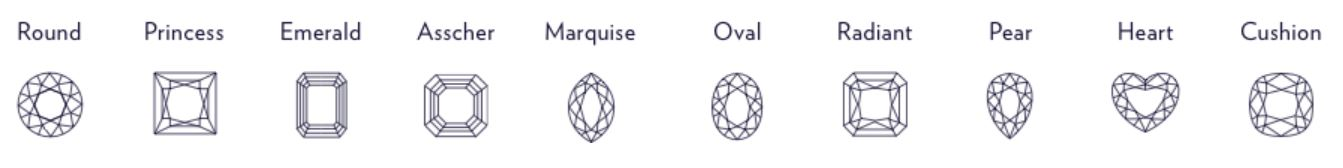

#### Color
Diamonds may appear anywhere from yellow/brown to colorless, the latter being the rarest.  Diamond graders typically grade according to the GIA scale presented below.  The dataset used for this lab includes only diamonds of the near-colorless and colorless quality.  Such diamonds are likely to command higher prices.  The data set contains a fairly even distribution of colors.
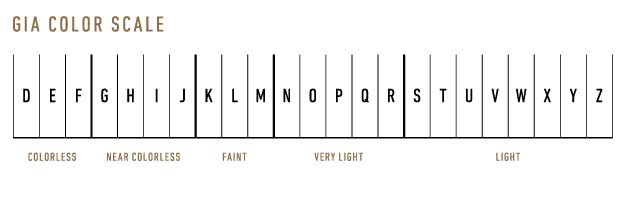

#### Clarity
A diamonds clarity deals with imperfections (or lack thereof) typically internal to the diamonds structure referred to as inclusions.  Of course, diamonds with little to no flaws are rare and command higher prices.  Again, most diamond are graded based on the GIA scale shown below.  The dataset for this lab presents a subset of clarities, ranging from internally-flawless to I$_{1}$.  Furthermore, the distribtion of data across clarities does not appear very uniform, particularly toward the higher end of the spectrum.
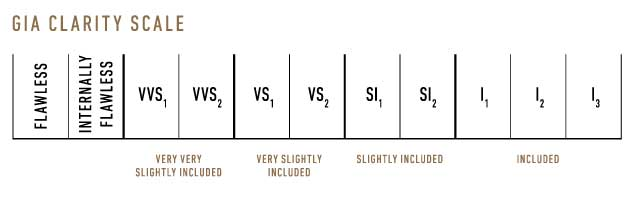
    
#### Cut
Cut deals primarily with the way that the diamond reflects light and should not be confused with its shape which is often casually referred to as “cut” by general consumers.  It should be noted that several of the features presented in the dataset are related to cut such as depth and table size.  Cut is graded based on the following GIA scale.  The dataset excludes the poor-cut category and replaces the excellent-cut with premium and ideal. In addition, the distibution of data across the cuts are skewed.
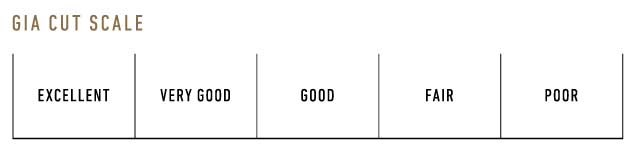
    
#### Carat
Carat is a measure of the diamond’s weight and is equivalent to 0.2g (0.007oz).  Larger diamonds tend to be rarer and command higher prices.  However, diamond retailers often refer to “magic” carat weights such as 1 carat.  In other words, a 1 carat diamond may have a significant price difference over a diamond of slightly less weight, all other things being equal, simply because it surpasses the “magic number” of 1 carat.  This dataset contains diamonds ranging between 0.2 and 5.1 carats.  However, 96% of the data (51,786 diamonds) are under 2.0 carats.  Therefore, we limit the size.  As we learned in Lab 1, this will also have the effect of lowering the overall price range as well. 

### The Dataset, proper
This dataset contains 43K carats of the estimated 1.2B carats worldwide (https://www.statista.com/topics/1704/diamond-industry/), or approximately 0.004%, and was last updated in 2017.  Unfortunately, little information is provided regarding the data itself outside and explanation of its features.  Relevant information such as the date of collection (relevant due to fluctuating commodity markets), the shape (round, oval, heart, etc.), etc. are not included.  We attempted to contact the author to gain a better understanding of the data, however, he was unavailable.  Despite these shortcomings, we felt this a good dataset for this lab as it conforms to the requirements, presents several data types for analysis, seems challenging, and was interesting.

### 80/20 Training-Test Split
The 80/20 rule invokes thoughts of the Pareto principle that has been (and continues to be) used in many situations across many domains.  Applying it here, we could theorize that 20% of the data is sufficient to account for remaining 80%.  We found reference to the “scaling law” (1 over the square root of the number of features) on Toward Data Science that ironically references the Pareto principle.  Applying in in our case of 10 features yields a 30%-70% split.  We also found a formula of the truncation of n to the ¾ power which in our case would yield 18K samples or 36%.  We also found several references to a 30/70 spilt as a general rule of thumb which corroborates the scaling law.
With ~50K samples a 20% split yields 10K, 30% yields 15K rows. Given our dataset, we have 7*8*5*6 = 1,680 unique combinations of categorical features, and a theoretically infinite set of numeric features.  Let’s assume 20 which would give us 33K combinations.  Finally, or price (classifier) data is not evenly distributed as was shown in the first lab.  If we want a representative set of our complete data, then 30/70 is probably a more appropriate split.

That said, we executed CV (see below) and basic logistic regression without any tuning and on all features, and were able to obtain rather similar results suggesting that the 80/20 split is acceptable here.

# Modeling

## Imports

In [9]:
import numpy as np
from numpy.linalg import pinv
from scipy.special import expit
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd

## From Dr. Larson's Notebooks

In [10]:
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [11]:
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

In [12]:
class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

In [13]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

## Our Updates to Dr. Larson's Code

In [14]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    
    L1 = ['L1Norm', 'l1norm', 'L1', 'l1', 'Lasso', 'lasso']
    L2 = ['L2Norm', 'l2norm', 'L2', 'l2', 'Ridge', 'ridge']
    L1L2 = ['L1L2', 'L1+L2', 'l1l2', 'l1+l2', 'both']
    GD = ['GradientDescent', 'gradientdescent', 'gd', 'GD']
    SD = ['StocasticGradientDescent', 'stocasticgradientdescent', 'sgd', 'SGD']
    NM = ['NewtonMethod', 'newtonmethod', 'Newton', 'newton', 'nm', 'NM']
        
    # extend init functions
    def __init__(self, eta, iterations=20, solver="GradientDescent", penalty='L2Norm', C=0.001, C2=0.001):        
        # need to add to the original initializer
        self.solver = solver
        self.penalty = penalty
        self.C = C
        self.C2 = C2
        self.print_keys = {}
        # but keep other keywords
        super().__init__(eta, iterations) # call parent initializer
     
    def _print_once(self, key, msg):
        if key not in self.print_keys.keys(): 
            self.print_keys[key] = 1
            print(msg)
            
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        
        # Get the gradient
        gradient = None
        hessian = None
        if self.solver in RegularizedBinaryLogisticRegression.GD:
            self._print_once("solver", "Using GradientDescent solver")
            ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)        
        elif self.solver in RegularizedBinaryLogisticRegression.SD:
            self._print_once("solver", "Using StocasticGradientDescent solver")
            idx = int(np.random.rand()*len(y)) # grab random instance
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
            gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)          
        elif self.solver in RegularizedBinaryLogisticRegression.NM:
            self._print_once("solver", "Using NewtonMethod solver")
            g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
            hessian = X.T @ np.diag(g*(1-g)) @ X # calculate the hessian
            ydiff = y-g # get y difference
            gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
        else:
            self._print_once("solver", "Using defualt solver")
            gradient = super()._get_gradient(X,y)
                
        # add in regularization (to all except bias term)
        if self.penalty in RegularizedBinaryLogisticRegression.L1:
            self._print_once("penalty", "Using L1Norm penalty")
            gradient[1:] += -self.C
                
        elif self.penalty in RegularizedBinaryLogisticRegression.L2:
            self._print_once("penalty", "Using L2Norm penalty")
            gradient[1:] += -2 * self.w_[1:] * self.C2
            
        elif self.penalty in RegularizedBinaryLogisticRegression.L1L2:
            self._print_once("penalty", "Using both L1 and L2Norm penalty")
            #apply L1
            gradient[1:] += -self.C
            #apply L2
            gradient[1:] += -2 * self.w_[1:] * self.C2

        elif self.penalty is None:
            self._print_once("penalty", "No penalty applied")
            
        else:
            self._print_once("penalty", "Using default penalty")
            
        if hessian is not None:
            gradient = pinv(hessian) @ gradient
        return gradient

In [44]:
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, eta, iterations=20, solver='GradientDescent', penalty='L2Norm', C=0.001, C2=0.001):        
        # need to add to the original initializer 
        self.C = C
        self.C2 = C2
        self.solver = solver
        self.penalty = penalty
        # but keep other keywords
        super().__init__(eta, iterations) # call parent initializer
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      solver=self.solver,
                                                      penalty=self.penalty,
                                                      C=self.C,
                                                      C2=self.C2)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

## Training

In [45]:
df = pd.read_csv('documents/diamonds.csv')

In [62]:
########################################
# Same changes as before, just compacted
########################################

# Drop dummy column
print("Dropping (Unnamed: 0) column")
df_cut = df.drop(["Unnamed: 0"], axis=1)

# Remove the few empty rows
before = df_cut.shape[0]
df_cut[['x','y','z']] = df_cut[['x','y','z']].replace(0,np.NaN)
df_cut.isnull().sum()
df_cut.dropna(inplace=True)
print("Removed empty rows: ", before-df_cut.shape[0])

# Make cut, color, clarity ordinal and then drop the old columns
print("Making cut, color, clarity ordinal")
df_cut['cut_ord'] = df_cut['cut']
df_cut['color_ord'] = df_cut['color']
df_cut['clarity_ord'] = df_cut['clarity']

df_cut.cut_ord.replace(to_replace=df_cut['cut_ord'].unique(),
               value = [4, 3, 2, 1, 0],
               inplace=True)
df_cut.color_ord.replace(to_replace=df_cut['color_ord'].unique(),
               value = [0, 1, 2, 3, 4, 5, 6],
               inplace=True)
df_cut.clarity_ord.replace(to_replace=df_cut['clarity_ord'].unique(),
               value = [2, 1, 4, 3, 5, 6, 0, 7],
               inplace=True)

df_cut = df_cut.drop(["cut"], axis=1)
df_cut = df_cut.drop(["color"], axis=1)
df_cut = df_cut.drop(["clarity"], axis=1)

# Create volume from the dimension, and then drop the old columns
print("Creating volumne column from x, y, z")
df_cut['volume'] = df_cut['x']*df_cut['y']*df_cut['z']
df_cut = df_cut.drop(["x"], axis=1)
df_cut = df_cut.drop(["y"], axis=1)
df_cut = df_cut.drop(["z"], axis=1)

# Get rid of the high-end diamonds
before = df_cut.shape[0]
indexs = df_cut[ df_cut['price'] > 14000 ].index
df_cut.drop(indexs , inplace=True)
print("Removed high priced samples rows: ", before-df_cut.shape[0])

print("Binning price")
y = pd.cut(x=df_cut['price'], bins=[0, 1000, 3000, 8000, 14000], labels=[0, 1, 2, 3])
y.astype('int64')
y = y.to_numpy()
print(y)

X = df_cut.drop(['price'], axis=1)
X = X.to_numpy()
print(X)

Dropping (Unnamed: 0) column
Removed empty rows:  20
Making cut, color, clarity ordinal
Creating volumne column from x, y, z
Removed high priced samples rows:  2153
Binning price
[0 0 0 ... 1 1 1]
[[  0.23      61.5       55.       ...   0.         2.        38.20203 ]
 [  0.21      59.8       61.       ...   0.         1.        34.505856]
 [  0.23      56.9       65.       ...   0.         4.        38.076885]
 ...
 [  0.7       62.8       60.       ...   6.         1.       114.449728]
 [  0.86      61.        58.       ...   3.         2.       140.76612 ]
 [  0.75      62.2       55.       ...   6.         2.       124.568444]]


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training size", X_train.shape[0])
print("Testing size", X_test.shape[0])
print("Training size", y_train.shape[0])
print("Testing size", y_test.shape[0])

Training size 41413
Testing size 10354
Training size 41413
Testing size 10354


In [64]:
import warnings
warnings.filterwarnings("ignore")
#from sklearn.linear_model import LogisticRegressionCV as SKLogisticRegressionCV
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.model_selection import cross_val_score

# Our Data
lr_sk = SKLogisticRegression(penalty='l2')
scores = cross_val_score(lr_sk, X, y, cv=5) # Default is KFold 
print("Diamonds CV=5 accuracy: %0.3f (+/- %0.2f) %0.3f" % (scores.mean(), scores.std() * 2, scores.max()))

lr_sk.fit(X_train,y_train)
yhat = lr_sk.predict(X_test)
print('Diamonds base accuracy: %0.3f' % accuracy_score(y_test,yhat))

Diamonds CV=5 accuracy: 0.787 (+/- 0.23) 0.936
Diamonds base accuracy: 0.833


In [65]:
%%time
#X = df.data
#y = df.target # note problem is NOT binary anymore, there are three classes!

lr = RegularizedLogisticRegression(eta=0.1, iterations=2500, C=0.01, C2=0.02, solver='gd')
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using GradientDescent solver
Using L2Norm penalty
Using GradientDescent solver
Using L2Norm penalty
Using GradientDescent solver
Using L2Norm penalty
Using GradientDescent solver
Using L2Norm penalty
MultiClass Logistic Regression Object with coefficients:
[[ 0.4683375  -0.02825595  3.02898663  2.39772526 -0.22390978 -0.12027922
  -1.73002552 -4.22369971]
 [ 0.20464505 -0.03523076  2.22900531  2.64025882  0.11171118  0.04810724
  -0.50428766 -3.96279919]
 [-1.28169969  0.07597823 -5.8437891  -4.64959833 -0.97672683 -0.11690685
  -1.71472215  7.49319395]
 [-1.16565907  0.02516176 -6.75676961 -6.40145824 -0.03984473  0.30676921
   1.64990046  3.41576608]]
Accuracy of:  0.587285336218054
CPU times: user 1min 27s, sys: 1.39 s, total: 1min 28s
Wall time: 15.1 s


In [71]:
%%time
#X = df.data
#y = df.target # note problem is NOT binary anymore, there are three classes!

lr = RegularizedLogisticRegression(eta=0.1, iterations=2500, C=0.01, C2=0.02, solver='sgd')
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using StocasticGradientDescent solver
Using L2Norm penalty
Using StocasticGradientDescent solver
Using L2Norm penalty
Using StocasticGradientDescent solver
Using L2Norm penalty
Using StocasticGradientDescent solver
Using L2Norm penalty
MultiClass Logistic Regression Object with coefficients:
[[ 1.88716754e+00 -1.25795338e-01  1.26326840e+01  1.10113035e+01
  -8.09622391e-02 -3.51783858e-01 -1.95329037e+00 -1.99221938e+01]
 [ 8.57875001e-01  1.48163488e-02  1.13589517e+01  7.72837123e+00
   8.73329646e-01  3.15656861e+00 -3.92805464e-01  3.11968736e+00]
 [-2.90821703e+00 -9.24028373e-02 -1.41644887e+01 -1.15196985e+01
  -3.12476264e-01 -1.24395307e+00 -2.68743512e+00 -1.69093534e+01]
 [-5.04427614e+00  2.79814908e-01 -2.58972420e+01 -2.34129042e+01
  -2.84480491e-01 -2.69162127e+00 -6.95952327e-01  4.35175651e+01]]
Accuracy of:  0.5238665559139992
CPU times: user 1.42 s, sys: 29.1 ms, total: 1.45 s
Wall time: 249 ms


In [69]:
%%time
#X = df.data
#y = df.target # note problem is NOT binary anymore, there are three classes!

lr = RegularizedLogisticRegression(eta=0.1, iterations=1, C=0.01, C2=0.02, solver='nm')
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using NewtonMethod solver
Using L2Norm penalty
Using NewtonMethod solver
Using L2Norm penalty
Using NewtonMethod solver
Using L2Norm penalty
Using NewtonMethod solver
Using L2Norm penalty
MultiClass Logistic Regression Object with coefficients:
[[ 8.88325307e-02 -2.73591724e-01  2.07130287e-03 -1.35149860e-03
  -6.37147009e-04 -2.62662649e-03 -3.44664196e-03 -9.73725308e-06]
 [ 9.94750424e-02 -1.33437307e-01 -1.92811761e-03  7.64823018e-04
   4.07668140e-04 -8.17208570e-04 -2.51060450e-03  5.66042516e-05]
 [-5.08802018e-01  2.08655289e-01  2.70099082e-03  2.73071429e-03
  -3.22794649e-03  1.75055225e-03 -1.05372249e-02 -1.05874838e-04]
 [-7.95055554e-02  1.98373742e-01 -2.84417608e-03 -2.14403871e-03
   3.45742536e-03  1.69328281e-03  1.64944713e-02  5.90078399e-05]]
Accuracy of:  0.6055595263391736
CPU times: user 1min 11s, sys: 1min 21s, total: 2min 32s
Wall time: 39.5 s


In [74]:
opt = ['gd', 'sgd', 'nm']
reg = ['l1', 'l2', 'l1l2', None]
C_arr = np.linspace(0.01, 0.9, 5)
results_list=np.empty(shape=(3,4,5,5))

for o in range(len(opt)):
    for r in range(len(reg)):
        for c in range(len(C_arr)):
            iterations=2500
            if o is 'nm':
                iterations=2
            if reg[r] is 'l1l2':
                for c2 in range(len(C_arr)):
                    lr = RegularizedLogisticRegression(eta=0.1, iterations=iterations, C=C_arr[c], C2=C_arr[c2], penalty=reg[r], solver=opt[o])
                    lr.fit(X,y)
                    yhat = lr.predict(X)
                    results_list [o][r][c][c2]=accuracy_score(y,yhat)
                    print('Accuracy of: ',accuracy_score(y,yhat))
            else:
                lr = RegularizedLogisticRegression(eta=0.1, iterations=iterations, C=C_arr[c], C2=C_arr[c], penalty=reg[r], solver=opt[o])
                lr.fit(X,y)
                yhat = lr.predict(X)
                results_list [o][r][c][0]=accuracy_score(y,yhat)
                print('Accuracy of: ',accuracy_score(y,yhat))

Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Accuracy of:  0.6124751289431491
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Accuracy of:  0.6811482218401684
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Accuracy of:  0.6973168234589603
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Accuracy of:  0.7282438619197559
Using GradientDescent solver
Using L1Norm penalty
Using GradientDesc

KeyboardInterrupt: 

### Visualizing the performance of the classifier versus the parameters

In [ ]:
#code from "https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
evr = [0.96, 0.9533, 0.9533, 0.96, 0.9533, 0.8333, 0.78, 0.84, 0.98, 0.9667, 0.9667, 0.9733]
evr_series = pd.Series.from_array(evr)

x_labels = ['GD, L1', 'GD, L2', 'GD, L1, L2', 'GD, None', 'SGD, L1', 'SGD, L2', 'SGD, L1, L2','SGD, None','NM, L1', 'NM, L2', 'NM, L1, L2', 'NM, None']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = evr_series.plot(kind='bar')
ax.set_title('Accuracy for Different Optimization Methods at 1st iteration where C = 0.01')
ax.set_xlabel('Analysis Method and Penalty')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with seven decimal places
        label = "{:.4f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.show()

### Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters? 

Definition of data snooping comes from https://methods.sagepub.com/reference/encyc-of-research-design/n102.xml

The term data snooping, sometimes also referred to as data dredging or data fishing, is used to describe the situation in which a particular data set is analyzed repeatedly without an a priori hypothesis of interest. The practice of data snooping, although common, is problematic because it can result in a significant finding (e.g., rejection of a null hypothesis) that is nothing more than a chance artifact of the repeated analyses of the data. The biases introduced by data snooping increase the more a data set is analyzed in the hope of a significant finding.

There is "data snooping" involved with this method of selecting parameters. We did not choose a model to implement before looking at the data. We used a brute force method and picked the best one and optimized the model.

### "Best" logistic regression optimization procedure versus scikit-learn procedure

In [34]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X,y)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

[[ 5.70758190e-01 -4.97962829e-01  2.99698325e-01  1.47290234e-02
  -1.52970260e-01 -5.67246075e-02 -7.58450023e-01 -2.40461425e-01]
 [ 4.26184119e-01 -2.06550753e+00 -1.52337713e-02  1.88492735e-02
   8.66091718e-03 -6.84134810e-03 -4.02231424e-02  1.37168984e-03]
 [-3.05592839e+00  3.61202903e+00 -2.06410180e-03  1.66609024e-02
  -7.33729973e-02  2.98656766e-02 -1.96236532e-01 -6.53553848e-03]
 [-5.70900487e-01  2.25335359e+00 -1.84663732e-01 -1.31098681e-01
   1.08914015e-01  2.43735306e-01  1.15404107e+00  5.59389679e-02]]
Accuracy of:  0.8294280139857438
CPU times: user 1.1 s, sys: 21.3 ms, total: 1.12 s
Wall time: 1.09 s


In [50]:
%%time

lr = RegularizedLogisticRegression(eta=0.1, iterations=20, C=0.01, C2=0.02, penalty = None, solver='nm')
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using NewtonMethod solver
No penalty applied


KeyboardInterrupt: 

In [36]:
%%time

lr = RegularizedLogisticRegression(eta=0.1, iterations=2500, C=0.01, C2=0.02, penalty = None, solver='gd')
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using GradientDescent solver
No penalty applied
Using GradientDescent solver
No penalty applied
Using GradientDescent solver
No penalty applied
Using GradientDescent solver
No penalty applied
MultiClass Logistic Regression Object with coefficients:
[[ 7.57113174e-02 -5.90876520e-02  4.98494095e+00  1.65127090e+00
  -2.16300440e+00 -1.15851356e+00 -1.07990858e+01 -5.29045142e+00]
 [ 1.59261352e-02 -1.45272448e-01 -1.99418306e+00  2.24644167e+00
   2.13456214e-02 -5.89959096e-01 -5.45866102e+00 -6.25760043e+00]
 [-2.21424741e-01  3.19494320e-01 -7.72608928e+00 -2.29001812e+00
  -5.58810387e+00  1.90927530e+00 -1.18086236e+01  7.58173430e+00]
 [-1.10374930e-01  6.06505041e-02 -7.71490057e+00 -7.43309441e+00
   1.87448527e+00  6.23516648e+00  1.75255823e+01  4.24002354e+00]]
Accuracy of:  0.5862808352811637
CPU times: user 1min 46s, sys: 5.07 s, total: 1min 51s
Wall time: 18.6 s


In [37]:
%%time

lr = RegularizedLogisticRegression(eta=0.1, iterations=2500, C=0.01, C2=0.02, penalty = 'l1', solver='gd')
lr.fit(X,y)
print(lr)

yhat = lr.predict(X)
print('Accuracy of: ',accuracy_score(y,yhat))

Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
Using GradientDescent solver
Using L1Norm penalty
MultiClass Logistic Regression Object with coefficients:
[[  0.12017377  -2.5417469    4.97821345   1.24028442  -3.90169432
   -2.23551136 -12.19110921  -4.70210661]
 [  0.10086322  -2.61430789   0.36269309   3.8110385   -1.47341792
   -1.94704474  -6.45605885  -3.14477264]
 [ -0.17404368  -2.16647248  -7.40574821  -2.32675452  -7.61821664
    0.31052201 -13.6519851    7.58129564]
 [ -0.08955498  -2.42457789  -9.02368917  -9.14466768  -0.2340634
    4.07206005  15.37414379   4.86098809]]
Accuracy of:  0.6124751289431491
CPU times: user 1min 41s, sys: 4.82 s, total: 1min 46s
Wall time: 17.7 s


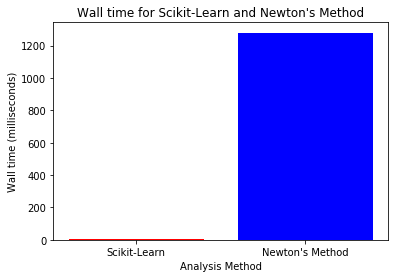

In [152]:
wall_time = [2.7, 1280]
bars = ('Scikit-Learn', "Newton's Method")
y_pos = np.arange(len(bars))
plt.bar(y_pos, wall_time, color=['red','blue'])
plt.xticks(y_pos, bars)

plt.title("Wall time for Scikit-Learn and Newton's Method")
plt.xlabel('Analysis Method')
plt.ylabel('Wall time (milliseconds)')

plt.show()

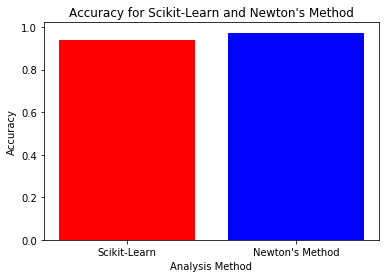

In [149]:
accuracy = [0.94, 0.9733]
bars = ('Scikit-Learn', "Newton's Method")
y_pos = np.arange(len(bars))
plt.bar(y_pos, accuracy, color=['red','blue'])
plt.xticks(y_pos, bars)

plt.title("Accuracy for Scikit-Learn and Newton's Method")
plt.xlabel('Analysis Method')
plt.ylabel('Accuracy')

plt.show()

Even though Newton's Method has an accuracy of 0.9733, its wall time is 1280 ms. This wall time is large in comparison to the 2.7 ms for Scikit-Learn. The accuracy for Scikit-Learn is 0.94. The main reason for the low wall time for Scikit-Learn is the use of parallelization that is separating out each classification, and the operations are all in lower level C++.

## Deployment

Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party)? Why?